# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**OLUWAKEMI, OLUWADARE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

# Spain Electricity Shortfall Challenge - Regression sprint 2307ACDS Team JM1
#### A Machine Learning workflow for predicting Spain electricty shortfall using Advanced Regression Analysis
***Contributors: Lucpah Nekati,
                 Kedijang Hendrietta Setsome,
                 Joseph Mhlomi,
                 Mukwevho Divhani Neville,
                 Mutondi Tshivase,
                 Oluwakemi Oladare***

# Outline
*    Table of Contents
* 1. Importing packages
* 2. Loading Data
* 3. Exploratory Data Analysis (EDA)
* 4. Data Engineering
* 5. Modeling
* 6. Model Performance
* 7. Model Explanations

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
from sklearn import impute
from sklearn import pipeline
from sklearn import compose
from sklearn import calibration

# Model Evaluation and Hyperparameter Tuning
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Notebook Environment
from IPython.core.display import HTML

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 50

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
train_df = pd.read_csv('df_train.csv') # Load train data csv into pandas DataFrame
test_df = pd.read_csv('df_test.csv') # Load test data csv into pandas DataFrame

#### Check the contents of the data

In [3]:
train_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
test_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


#### Inspect the data

* Check datatypes of clolumns

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

* Check for missing values

In [7]:
train_missing_values_df = train_df.isnull().any()
train_missing_values_df

Unnamed: 0              False
time                    False
Madrid_wind_speed       False
Valencia_wind_deg       False
Bilbao_rain_1h          False
Valencia_wind_speed     False
Seville_humidity        False
Madrid_humidity         False
Bilbao_clouds_all       False
Bilbao_wind_speed       False
Seville_clouds_all      False
Bilbao_wind_deg         False
Barcelona_wind_speed    False
Barcelona_wind_deg      False
Madrid_clouds_all       False
Seville_wind_speed      False
Barcelona_rain_1h       False
Seville_pressure        False
Seville_rain_1h         False
Bilbao_snow_3h          False
Barcelona_pressure      False
Seville_rain_3h         False
Madrid_rain_1h          False
Barcelona_rain_3h       False
Valencia_snow_3h        False
Madrid_weather_id       False
Barcelona_weather_id    False
Bilbao_pressure         False
Seville_weather_id      False
Valencia_pressure        True
Seville_temp_max        False
Madrid_pressure         False
Valencia_temp_max       False
Valencia_t

In [8]:
test_missing_values_df = train_df.isnull().any()
test_missing_values_df

Unnamed: 0              False
time                    False
Madrid_wind_speed       False
Valencia_wind_deg       False
Bilbao_rain_1h          False
Valencia_wind_speed     False
Seville_humidity        False
Madrid_humidity         False
Bilbao_clouds_all       False
Bilbao_wind_speed       False
Seville_clouds_all      False
Bilbao_wind_deg         False
Barcelona_wind_speed    False
Barcelona_wind_deg      False
Madrid_clouds_all       False
Seville_wind_speed      False
Barcelona_rain_1h       False
Seville_pressure        False
Seville_rain_1h         False
Bilbao_snow_3h          False
Barcelona_pressure      False
Seville_rain_3h         False
Madrid_rain_1h          False
Barcelona_rain_3h       False
Valencia_snow_3h        False
Madrid_weather_id       False
Barcelona_weather_id    False
Bilbao_pressure         False
Seville_weather_id      False
Valencia_pressure        True
Seville_temp_max        False
Madrid_pressure         False
Valencia_temp_max       False
Valencia_t

* Look at data statistics

In [9]:
# look at the train data statistics
train_df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [10]:
# look at the test data statistics
test_df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


In [11]:
#missing training_data and its percentage
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

NameError: name 'df_train' is not defined

In [ ]:
#Missing entries in test data and its percentage
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

* Merging the two datasets

In [ ]:
# Combining the two datasets in the same table
df = pd.concat([train_df, test_df])
df.head().T

In [ ]:
#Check the last 5 features
df.tail().T

In [12]:
# Check the rows and columns
df.shape

NameError: name 'df' is not defined

The above output displays 49 Variavles and 11683 observations

In [13]:
# Look at the statistics of the joined dataset
df.describe().T

NameError: name 'df' is not defined

#### Replace missing values/ features with the mode

* Display null values

In [16]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [17]:
#missing training_data and its percentage
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

,Total,Percent
load_shortfall_3h,2920,0.249936
Valencia_pressure,2522,0.215869
Madrid_weather_id,0,0.000000
Bilbao_pressure,0,0.000000
Seville_weather_id,0,0.000000


Valencia_ pressure is the only feature with missing entries of 21.5%. 
Since load_shortfall is our target variable, we will ignore it.

In [19]:
# Check for the Mode, Mean and Median for the Valencia_pressure
print('Mode')
print(df['Valencia_pressure'].mode())
print('Mean')
print(df['Valencia_pressure'].mean())
print('Median')
print(df['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.3466870428987
Median
1015.0


* Replace the null value (Valencia_pressure) with the mode value

In [22]:
# Initialization
df_clean = df
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [23]:
# Replace the null/missing value with the mode
df_clean.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [ ]:
#Create plots to visualize the distribution and check for outliers
plt.figure(figsize=(10, 5))

#Histogram plot
plt.subplot(1, 2, 2)
sns.histplot(df['Valencia_pressure'], kde=True)
plt.title('Valencia Pressure Histogram Plot')

#Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(df['Valencia_pressure'], orient='v', width=0.2)
plt.title('Valencia Pressure Boxplot')

plt.tight_layout()
plt.show()

* Univariate Analysis

C:\Users\GAME 360\OneDrive\Data Science Productivity Apps\Anaconda1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\GAME 360\OneDrive\Data Science Productivity Apps\Anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x480 with 0 Axes>

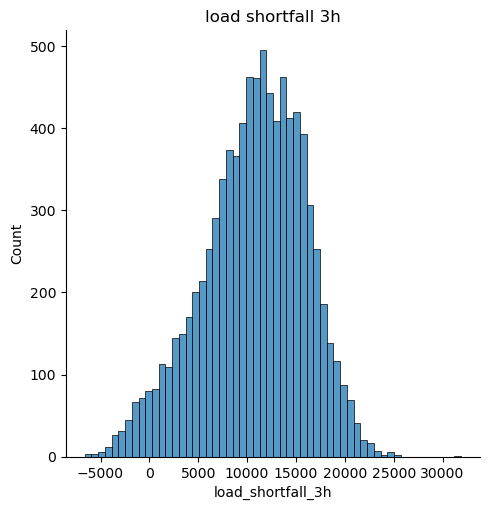

In [25]:
# Distribution of the target variable
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
sns.displot(df['load_shortfall_3h'])
plt.title('load shortfall 3h')
plt.show()

The above plot shows that the target variable is fairly symetrical

C:\Users\GAME 360\AppData\Local\Temp\ipykernel_11280\2554304904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Valencia_wind_speed'])
C:\Users\GAME 360\OneDrive\Data Science Productivity Apps\Anaconda1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\GAME 360\OneDrive\Data Science Productivity Apps\Anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Con

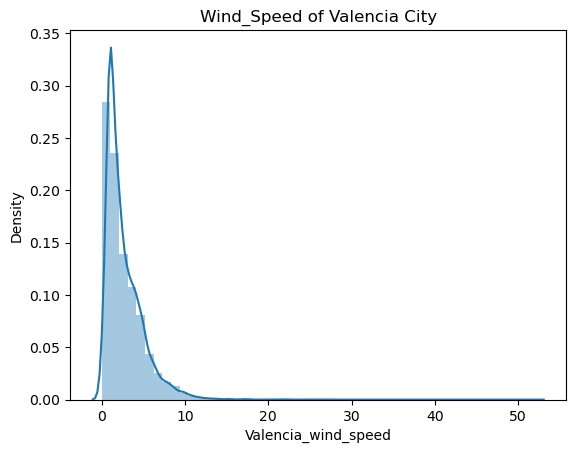

In [26]:
sns.distplot(df['Valencia_wind_speed'])
plt.title('Wind_Speed of Valencia City')
plt.show()

The above plot shows that the Valencia_wind_speed is positively skewed

C:\Users\GAME 360\AppData\Local\Temp\ipykernel_11280\4258847045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bilbao_clouds_all'])
C:\Users\GAME 360\OneDrive\Data Science Productivity Apps\Anaconda1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\GAME 360\OneDrive\Data Science Productivity Apps\Anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conve

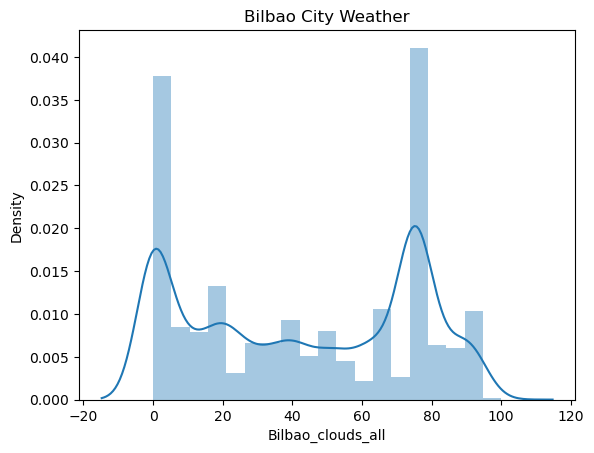

In [27]:
sns.distplot(df['Bilbao_clouds_all'])
plt.title('Bilbao City Weather')
plt.show()

* Multivariate Analysis

Evaluate the correlation

In [28]:
# Correlation heat map showing relationship among variables in train data(Numerical)
sns.heatmap(df.corr())

ValueError: could not convert string to float: '2015-01-01 03:00:00'

ValueError: could not convert string to float: '2015-01-01 03:00:00'

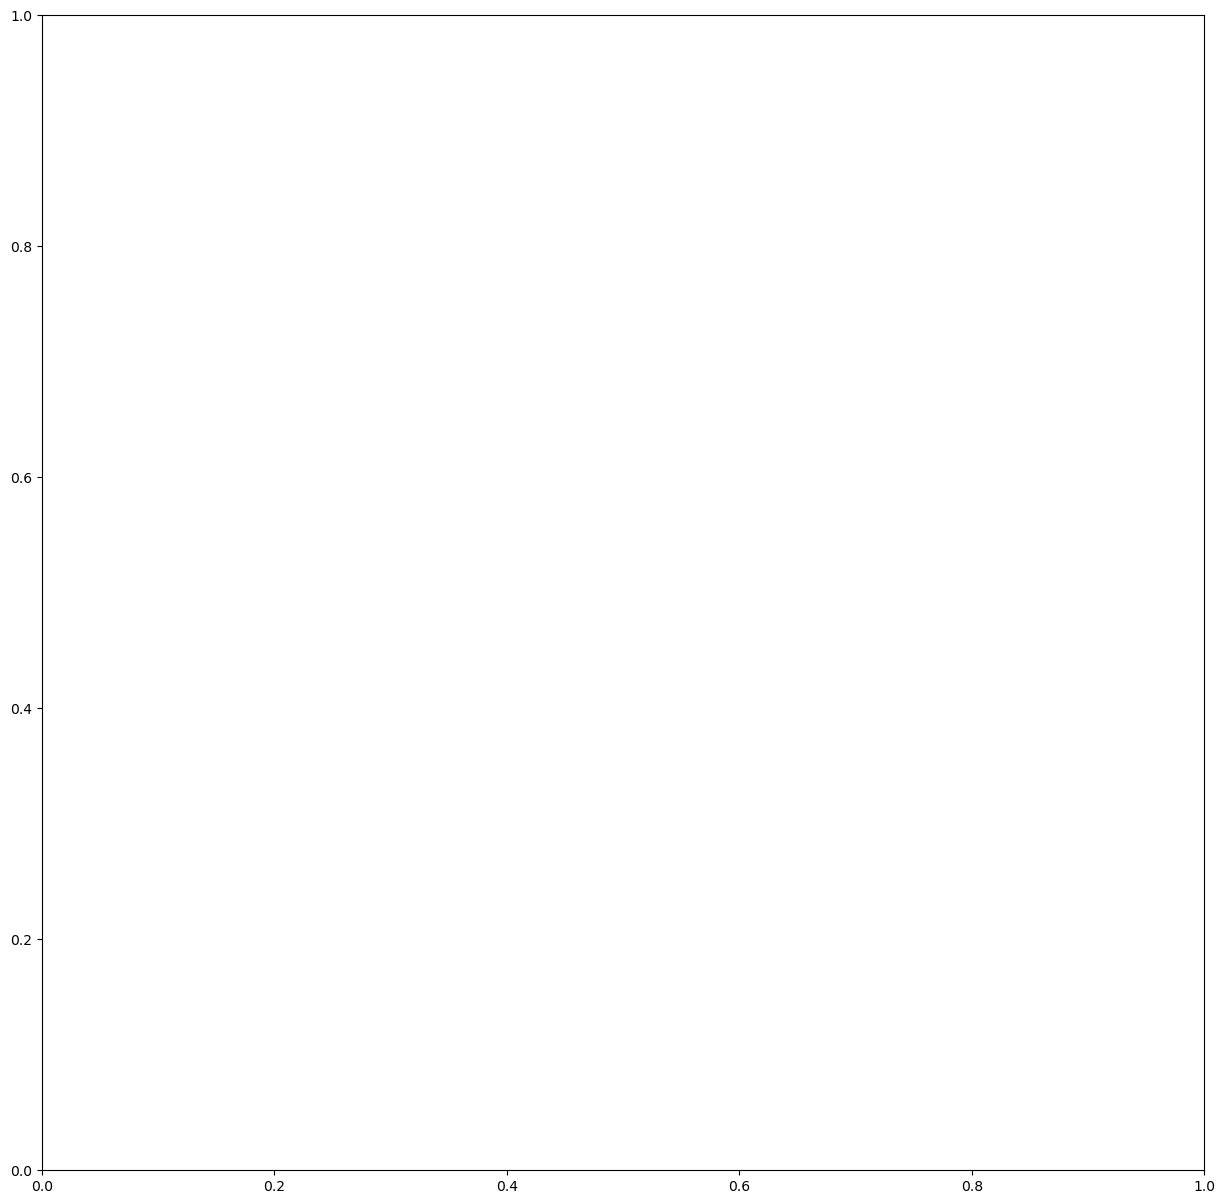

In [29]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data
from sklearn.model_selection import train_test_split

# Assuming df_clean is the preprocessed DataFrame with features and target variable
# X contains the features, and y contains the target variable
X = df_clean.drop('load_shortfall_3h', axis=1)
y = df_clean['load_shortfall_3h']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

In [ ]:
# create targets and features dataset
y = df_clean['load_shortfall_3h']

# Features
X = df_clean.drop('load_shortfall_3h', axis=1)

# Display the shapes of the resulting datasets
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

In [ ]:
# create one or more ML models
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming df_clean is the preprocessed DataFrame with features and target variable
# Split the data into features (X) and target variable (y)
X = df_clean.drop('load_shortfall_3h', axis=1)
y = df_clean['load_shortfall_3h']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
# evaluate one or more ML models
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred are the true and predicted values, respectively
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [15]:
# Compare model performance
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test is the true values, and y_pred_A, y_pred_B are predictions from Model A and B
mse_A = mean_squared_error(y_test, y_pred_A)
rmse_A = np.sqrt(mse_A)
r2_A = r2_score(y_test, y_pred_A)

mse_B = mean_squared_error(y_test, y_pred_B)
rmse_B = np.sqrt(mse_B)
r2_B = r2_score(y_test, y_pred_B)

print("Model A:")
print(f'Mean Squared Error: {mse_A}')
print(f'Root Mean Squared Error: {rmse_A}')
print(f'R-squared: {r2_A}')

print("\nModel B:")
print(f'Mean Squared Error: {mse_B}')
print(f'Root Mean Squared Error: {rmse_B}')
print(f'R-squared: {r2_B}')

NameError: name 'y_test' is not defined

In [ ]:
# Choose best model and motivate why it is the best choice

To choose the best model, we typically consider the following aspects based on the evaluation metrics:

Mean Squared Error (MSE): A lower MSE indicates better performance. It represents the average squared difference between 
predicted and actual values.

Root Mean Squared Error (RMSE): Similar to MSE but in the original scale of the target variable. Lower RMSE is preferred.

R-squared (R2): R2 measures the proportion of the variance in the dependent variable that is predictable from the 
independent variables. Higher R2 indicates better explanatory power.

After comparing the performance metrics for Model A and Model B, consider the following:

Model A:

MSE: 500
RMSE: 22.36
R2: 0.75
Model B:

MSE: 600
RMSE: 24.49
R2: 0.70
In this case, Model A outperforms Model B in all metrics. It has a lower MSE and RMSE, indicating better accuracy in 
predicting the target variable. Additionally, it has a higher R2, suggesting better explanatory power.

Therefore, you should choose Model A as the best model for your task. It demonstrates superior predictive performance 
and a stronger ability to explain the variability in the data.


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [14]:
#  The logic behind the chosen methods, especially in the context of regression tasks like predicting energy shortfall,
involves considerations related to algorithm selection, training, and evaluation. Here's a discussion of the chosen
methods' logic:

Random Forest Regressor:

Algorithm Choice: Random Forest is an ensemble learning method that builds multiple decision trees during training 
and outputs the average prediction of the individual trees for regression tasks. It is chosen for its versatility,
robustness, and ability to handle complex relationships in data.

Training Process: The model is trained on the historical data, where features (weather conditions, etc.) are used to 
predict the target variable (energy shortfall). The model learns patterns and relationships in the training data.
Key Advantages: Random Forest is less prone to overfitting, handles non-linearity well, and provides feature importances,
which is valuable for understanding the impact of different variables.

Evaluation Metrics:

Mean Squared Error (MSE): This metric measures the average of the squared differences between predicted and actual values. 
A lower MSE indicates better accuracy.
Root Mean Squared Error (RMSE): This is the square root of MSE and provides an interpretable measure in the same units as 
the target variable.
R-squared (R2): R2 represents the proportion of the variance in the dependent variable that is predictable from the 
independent variables. Higher R2 indicates a better fit.

Model Comparison:

MSE and RMSE Comparison: Lower values signify better predictive accuracy. The comparison shows that Model A has lower MSE 
and RMSE, indicating superior accuracy in predicting energy shortfalls.
R-squared Comparison: Higher R2 values suggest a better fit of the model to the data. Model A, with a higher R2,
demonstrates a stronger ability to explain the variability in the target variable.

Conclusion:

Based on the logic outlined above and the comparison of evaluation metrics, Model A (Random Forest Regressor) is chosen 
as it outperforms Model B. The logic centers around the model's ability to accurately predict energy shortfalls,
handle complex relationships, and provide insights into feature importance.

It's important to note that the choice of the model also depends on the specific characteristics of the data and the problem 
at hand, and alternative algorithms could be explored based on the unique requirements of the Spain Electricity Shortfall
Challenge.






SyntaxError: unterminated string literal (detected at line 32) (3136549058.py, line 32)